# Module 8 Assignment


A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.neighbors import KernelDensity


In [ ]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.neighbors import KernelDensity

from nose.tools import assert_equal, assert_is_instance, assert_is_not, assert_almost_equal

The problems will use data from the down jones index.

In [2]:
df = pd.read_csv('dow_jones_index.data')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [ ]:
#Load the data and see what it looks like
df = pd.read_csv('./dow_jones_index.data')
df.head()

# Problem 1: Making a histogram

Write a function called `histogram_plotter` that takes in a DataFrame, a column name from that DataFrame, and a number of bins, and plots a histogram of the data in that column.

Furthermore:

1. Set the y axis label to `Counts`

2. Set the x axis label to the name of the column being plotted

In [3]:
def histogram_plotter(df, column, num_bins):
    """
    Input
    ------
    df: a pandas dataframe that contains the column we want to plot
    
    column: a string that is the name of the column to be plotted
    
    num_bins: an integer, the number of bins to use
    
    Output
    ------
    
    ax: a matplotlib.axes._subplots.AxesSubplot object
    """
        
    ### YOUR CODE HERE
    
    return ax

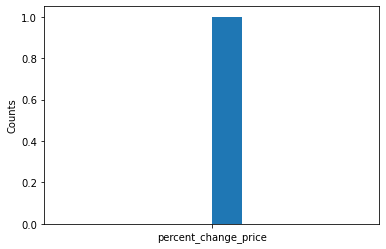

In [4]:
plt.hist(x="percent_change_price")
plt.ylabel("Counts")
plt.show()

In [ ]:
my_plot = histogram_plotter(df, 'open', 20)

In [ ]:
assert_equal(my_plot.get_xlabel(), 'open')
assert_is_instance(my_plot,mpl.axes. Axes)
assert_almost_equal(my_plot.get_ylim()[1], 100.8)
assert_equal(len(my_plot.get_xticks()), 11)
assert_equal(my_plot.get_ylabel(), 'Counts')

# Problem 2: Kernel Density Estimation

Write a function called `kde_plotter` that takes in a DataFrame, a column name from that DataFrame, and a number of bins, and plots a histogram of the data in that column along with a kernel density estimate of the data in that column, using the Sseaborn library.

Furthermore:

1. Set the y axis label to `Density`.

2. Set the x axis label to the name of the column being plotted.

In [5]:
def kde_plotter(df, column, num_bins):
    """
    Input
    ------
    df: a pandas dataframe that contains the column we want to plot
    
    column: a string that is the name of the column to be plotted
    
    num_bins: an integer, the number of bins to use
    
    
    Output
    ------
    
    ax: a matplotlib.axes._subplots.AxesSubplot object
    """
    
   ### YOUR CODE HERE
    
    return ax

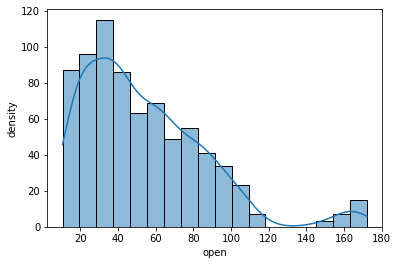

In [6]:
sns.histplot(data=df.open, kde=True)
plt.ylabel("density")
plt.show()

In [ ]:
my_kde = kde_plotter(df, 'open', 20)

In [ ]:
x, y = my_kde.get_lines()[0].get_data()
assert_almost_equal(0.00159, y[10], places=3)
assert_almost_equal(17.617908, x[20], places=3)
assert_equal(my_kde.get_xlabel(), 'open')
assert_is_instance(my_kde,mpl.axes.Axes)
assert_equal(my_kde.get_ylabel(), 'Density')

# Problem 3: Generating More Stock Data

We have taken a subset of the dow jones dataset and stored in a variable called `X` which is displayed below. Using the data in `X` we want to generate more stock data by fitting a KDE and sampling from its distribution.

Your task is to complete the function `gen_stock_data`. This function takes in `X` (the data), `n_samples` (the number of samples to produce), and `random_state` (which is used to control to control the generator state used for random sampling.)

For this function:
- Create a `KernelDensity` by using the [sklearn's library KDE estimator](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) *(Use the default parameters of KernelDensity)*.
- fit the `KernelDensity` on `X`
- Sample from the `KernelDensity` using `n_samples` and the `random_state`
- Lastly, return the sample

In [7]:
X = df[['open', 'high', 'low', 'close']]
X.head()

,open,high,low,close
0,15.82,16.72,15.78,16.42
1,16.71,16.71,15.64,15.97
2,16.19,16.38,15.60,15.79
3,15.87,16.63,15.82,16.13
4,16.18,17.39,16.18,17.14


In [8]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)

In [9]:
kde

KernelDensity(bandwidth=0.5)

In [ ]:
def gen_stock_data(X, n_samples=100, random_state=0):
    '''
    X - dataset containing subset of dowjones
    n_samples - integer which tells us how many samples to return
    random_state - controls generator state for random sampling
    '''
    
    ### YOUR CODE HERE

## Visually let us compare generated data against sampled data

In [ ]:
sd1 = gen_stock_data(X, n_samples=1000, random_state=0)
fig, ((ax1_orig, ax2_orig, ax3_orig, ax4_orig),
      (ax1_samp ,ax2_samp, ax3_samp, ax4_samp)) = plt.subplots(2, 4, figsize=(10, 5))

ax1_orig.hist(X.open, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')
ax2_orig.hist(X.high, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')
ax3_orig.hist(X.low, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')
ax4_orig.hist(X.close, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')

def column(matrix, i):
    return [row[i] for row in matrix]

ax1_samp.hist(column(sd1,0), alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')
ax2_samp.hist(column(sd1,1), alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')
ax3_samp.hist(column(sd1,2), alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')
ax4_samp.hist(column(sd1,3), alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')

for i in [ax1_orig, ax2_orig, ax3_orig, ax4_orig, ax1_samp ,ax2_samp, ax3_samp, ax4_samp]:
    if i != ax1_orig or i != ax1_samp:
        i.set_yticks([])

ax1_orig.set_title('open', fontsize=14)
ax2_orig.set_title('high', fontsize=14)
ax3_orig.set_title('low', fontsize=14)
ax4_orig.set_title('close', fontsize=14)
ax1_orig.set_ylabel('Orignal Data', fontsize=14)
ax1_samp.set_ylabel('Sampled Data', fontsize=14)

## Check Your Solution

In [ ]:
from helper import gsd

assert_is_instance(sd1, np.ndarray, msg='Your function does not return a numpy array.')
assert_equal(len(sd1), 1000, msg='Your function should use the n_samples parameter. The array should return 1000 rows it current returns {0}'.format(len(sd1)))
assert_equal(np.array_equal(sd1, gsd(X, n_samples=1000, random_state=0)), True, msg='The generated data does not match the solution')

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 